# Загрузка всех необходимых данных

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import kagglehub

path = kagglehub.dataset_download("parulpandey/forbes-highest-paid-athletes-19902019")

print("Path to dataset files:", path)
# path = kagglehub.dataset_download("parulpandey/forbes-highest-paid-athletes-19902019")
df = pd.read_csv(path + '/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

Path to dataset files: /kaggle/input/forbes-highest-paid-athletes-19902019


# EDA

## Просмотр данных

In [7]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 84.0 KB


In [9]:
df['Nationality'].unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

In [10]:
df['Current Rank'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
df['Previous Year Rank'].unique()

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [12]:
df['Sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

### Вывод

Просмотрев на данные можно сделать следующие выводы. Current Rank является категориальным данным. И его необходимо преобразовать на тип данных object

### Преобразование данных

In [13]:
df['Current Rank'] = df['Current Rank'].astype(object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    object 
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.9+ KB


## Работа с дубликатами и c пропущенными данными

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isnull().mean()

,0
S.NO,0.000000
Name,0.000000
Nationality,0.000000
Current Rank,0.000000
Previous Year Rank,0.079734
Sport,0.000000
Year,0.000000
earnings ($ million),0.000000


В столбце пропущенные данные в Previous Year Rank. Данный столбец является категориальными. Поэтому заполним пропущенные данные модой

In [20]:
df['Previous Year Rank'] = df['Previous Year Rank'].fillna(df['Previous Year Rank'].mode().iloc[0])

In [21]:
df.isnull().mean()

,0
S.NO,0.0
Name,0.0
Nationality,0.0
Current Rank,0.0
Previous Year Rank,0.0
Sport,0.0
Year,0.0
earnings ($ million),0.0


### Вывод

*   Посмотрели на дубликаты. Их нет
*   Посмотрели на пропущенные данные и заполнили его модой, потому что столбец имеет категориальный




## Одномерный анализ

### Категориальные переменные

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    object 
 4   Previous Year Rank    301 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.9+ KB


In [27]:
df.describe(include='object')

,Name,Nationality,Current Rank,Previous Year Rank,Sport
count,301,301,301,301,301
unique,82,22,10,36,29
top,Michael Jordan,USA,9,>10,Basketball
freq,19,206,34,60,54


В данном датасете категориальные данные Name, Nationality, Current Rank, Previous Year Rank, Sport. Посмотрим только на некоторые. Например, исследовать Name бессмысленно


#### Столбец Nationality

In [23]:
df['Nationality'].unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

In [25]:
df['Nationality'].value_counts(normalize=True)

,proportion
Nationality,
USA,0.684385
UK,0.043189
Germany,0.043189
Switzerland,0.039867
Portugal,0.033223
Brazil,0.029900
Argentina,0.029900
Canada,0.019934
Italy,0.013289


<ipython-input-34-24027e670b1c>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


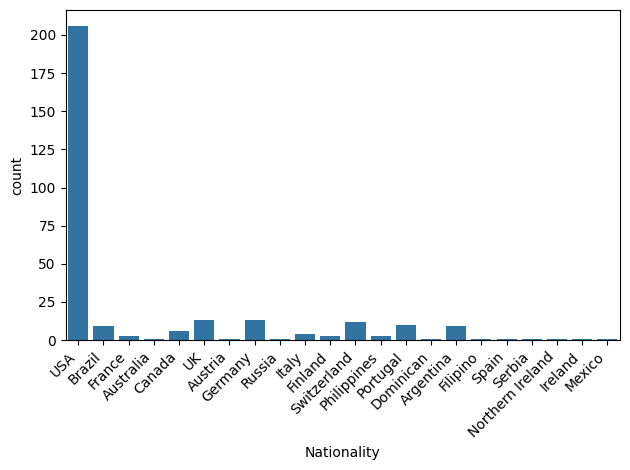

In [34]:
plot = sns.countplot(x = 'Nationality', data = df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Вывод

В данном столбце много стран, где мало данных. Можно их соедить в один, например, назвать "Other" (Другие)

#### Столбец Current Rank

In [32]:
df['Current Rank'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [33]:
df['Current Rank'].value_counts(normalize=True)

,proportion
Current Rank,
9,0.112957
2,0.106312
5,0.106312
6,0.106312
1,0.099668
3,0.099668
8,0.099668
4,0.093023
7,0.093023


<ipython-input-40-9e96d572eb81>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=-45, ha='right')


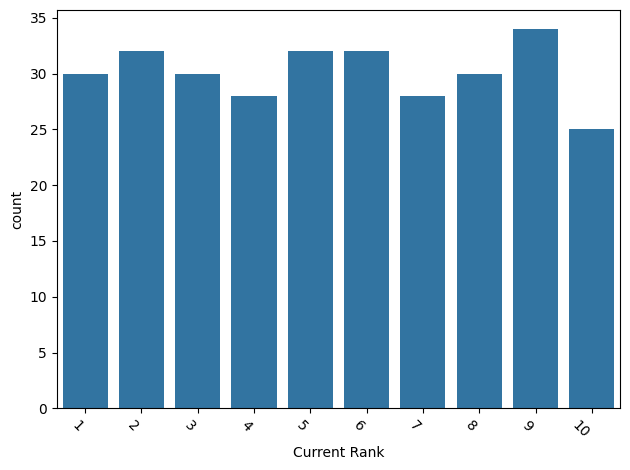

In [40]:
plot = sns.countplot(x = 'Current Rank', data = df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=-45, ha='right')
plt.tight_layout()
plt.show()

##### Вывод

В данном столбце данные имеет равномерное распределение

#### Столбец Previous Year Rank

In [42]:
df['Previous Year Rank'].unique()

array(['>10', '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>20', '?', '24', '21',
       '>14', '>100', '??'], dtype=object)

In [43]:
df['Previous Year Rank'].value_counts(normalize=True)

,proportion
Previous Year Rank,
>10,0.199336
1,0.083056
3,0.069767
5,0.069767
2,0.066445
6,0.059801
7,0.056478
4,0.056478
8,0.046512


<ipython-input-47-c093f7b08a3d>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=-45, ha='right')


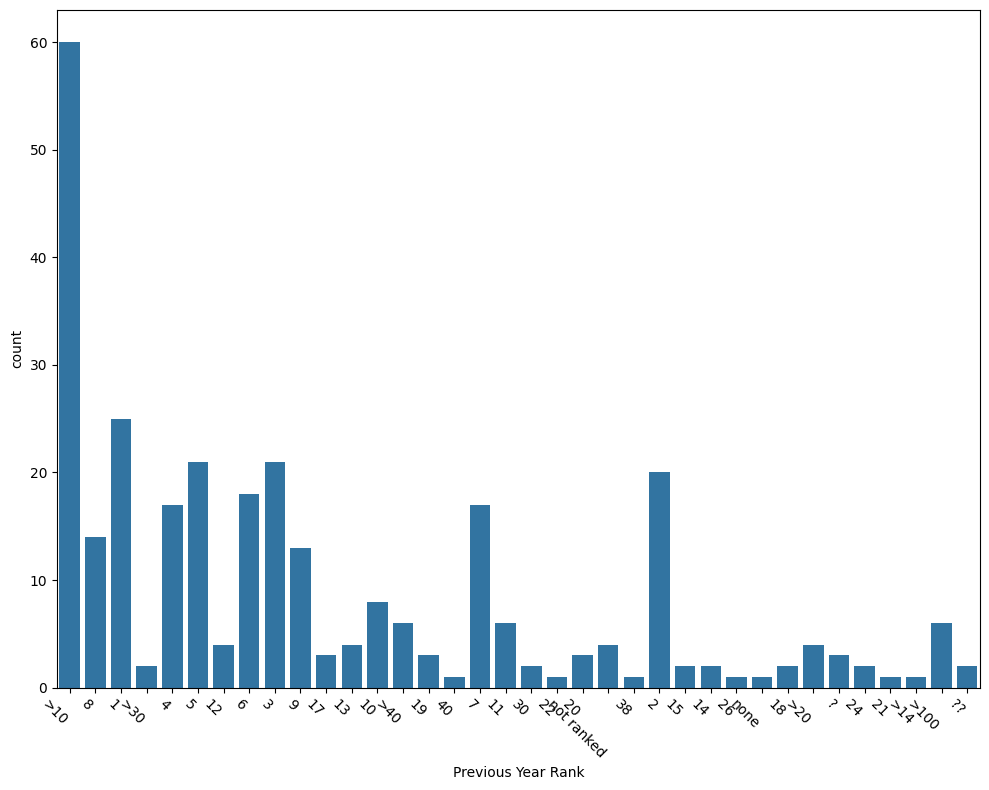

In [47]:
plt.figure(figsize=(10, 8))
plot = sns.countplot(x = 'Previous Year Rank', data = df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=-45, ha='right')
plt.tight_layout()
plt.show()

##### Вывод

Очень много грязных данных. Даже непонятно

#### Столбец Sport

In [49]:
df['Sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

In [50]:
df['Sport'].value_counts()

,count
Sport,
Basketball,54
Boxing,29
basketball,27
Golf,24
Soccer,22
golf,20
Tennis,18
American Football,17
boxing,17


<ipython-input-52-ea3726295c50>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=-45, ha='right')


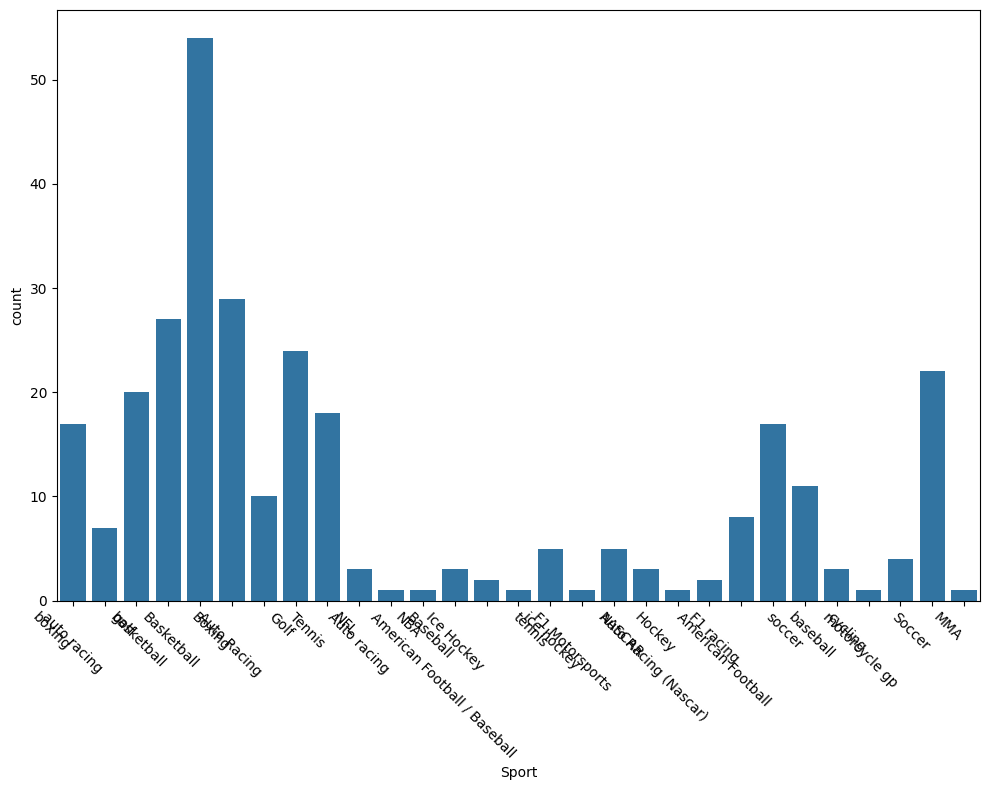

In [52]:
plt.figure(figsize=(10, 8))
plot = sns.countplot(x = 'Sport', data = df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=-45, ha='right')
plt.tight_layout()
plt.show()

##### Вывод

В данном столбце много видов спорта, где мало данных. Можно их соедить в один, например, назвать "Other" (Другие)

### Количественные переменные

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    object 
 4   Previous Year Rank    301 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.9+ KB


In [56]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,>10,boxing,1990,28.6
1,2,Buster Douglas,USA,2,>10,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,>10,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,>10,auto racing,1990,10.0
4,5,Alain Prost,France,5,>10,auto racing,1990,9.0


In [55]:
numeric_cols = df.select_dtypes(include=['number'])

list_percintil = numeric_cols.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90]).T

list_percintil['median'] = numeric_cols.median()
list_percintil['variance'] = numeric_cols.var()
list_percintil['missing'] = numeric_cols.isna().sum()

list_percintil = list_percintil[['missing', 'min', 'max', 'mean', 'median', 'variance', '10%', '25%', '50%', '75%', '90%']]

list_percintil = list_percintil.T
list_percintil

,S.NO,Year,earnings ($ million)
missing,0.000000,0.000000,0.000000
min,1.000000,1990.000000,8.100000
max,301.000000,2020.000000,300.000000
mean,151.000000,2005.122924,45.516279
median,151.000000,2005.000000,39.000000
variance,7575.166667,82.148173,1123.948234
10%,31.000000,1993.000000,13.500000
25%,76.000000,1997.000000,24.000000
50%,151.000000,2005.000000,39.000000
75%,226.000000,2013.000000,59.400000


Посмотрев на данные уже можно делать выводы. S.NO бессмысленный, потому что идентификационный номер, с Year явно какие-то проблемы. Так и непонятно что он ознается год рождения или год получения прибыли или что-то еще. С earnings все понятно. По кванлям понятно, что 10% получают выше 85 млн.$. Исследование подробнее проведем только заработку

В данном случае лишь три столбца

#### Столбец earnings ($ million)

In [61]:
import plotly.express as px

In [65]:
px.histogram(data_frame = df, x = 'earnings ($ million)', marginal = 'box')

##### Вывод

По данным понятно, что половина зарабатывает от 24 до 64 млн.\$
Есть несколько людей, которые зарабатывают более 300 млн.\$  

## Двумерный анализ

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    object 
 4   Previous Year Rank    301 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.9+ KB


### Количественный и категориальный переменные

Меня интересует только

*   Nationality и earnings
*   Current Rank и earnings
*   Sport и earnings





#### Nationality и earnings

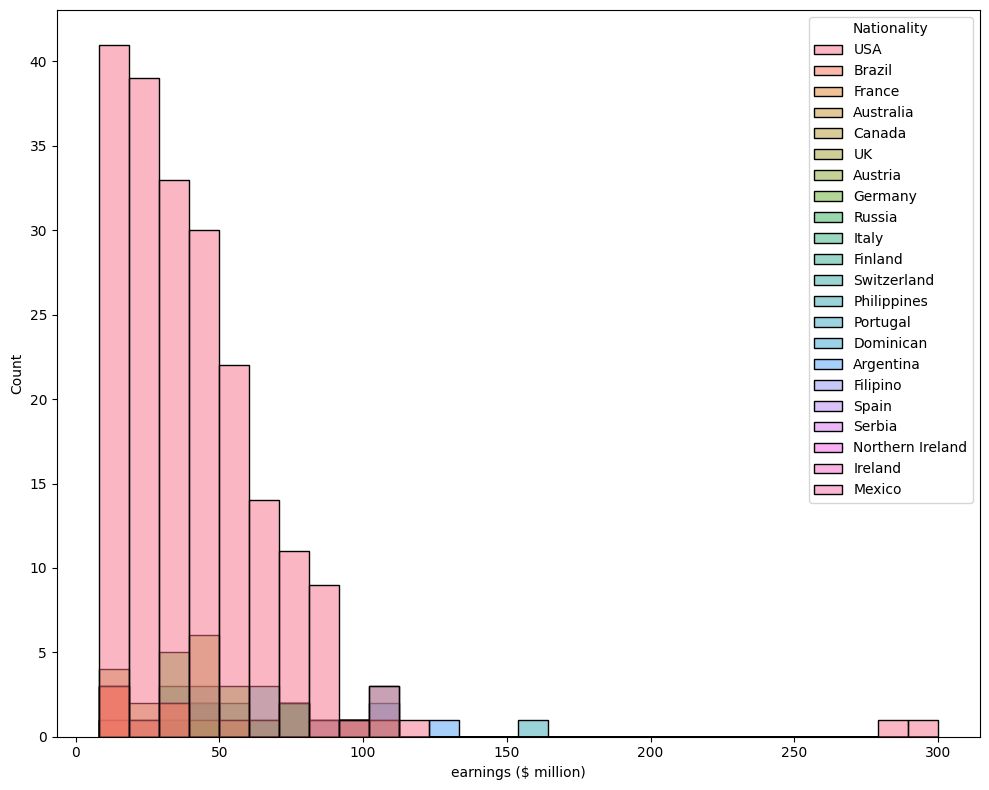

In [72]:
plt.figure(figsize=(10, 8))
sns.histplot(x = 'earnings ($ million)', hue = 'Nationality', data = df)
plt.tight_layout()
plt.show()

##### Вывод

Заработок сильно зависит от страны проживания

#### Current Rank и earnings

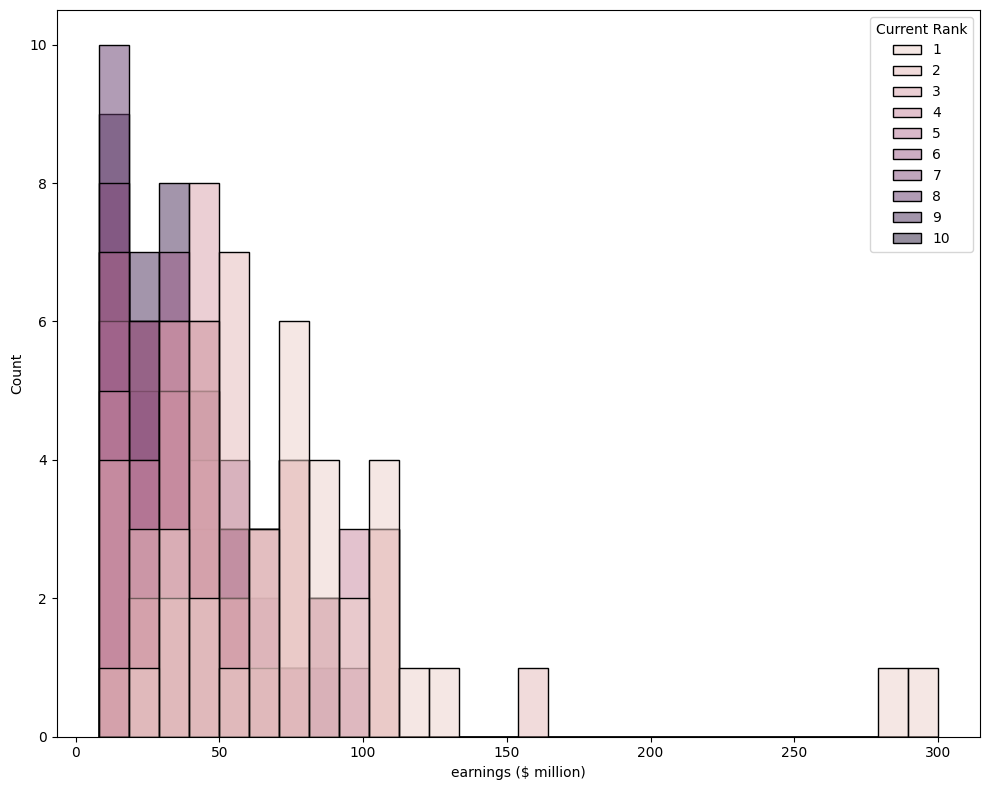

In [73]:
plt.figure(figsize=(10, 8))
sns.histplot(x = 'earnings ($ million)', hue = 'Current Rank', data = df)
plt.tight_layout()
plt.show()

In [75]:
px.box(df, x = 'Current Rank', y = 'earnings ($ million)', points= 'all')

In [77]:
# px.histogram(df, x = 'earnings ($ million)', color = 'Current Rank', marginal= 'box')

##### Вывод

Первые ранги зарабатывют больше

#### Sport и earnings

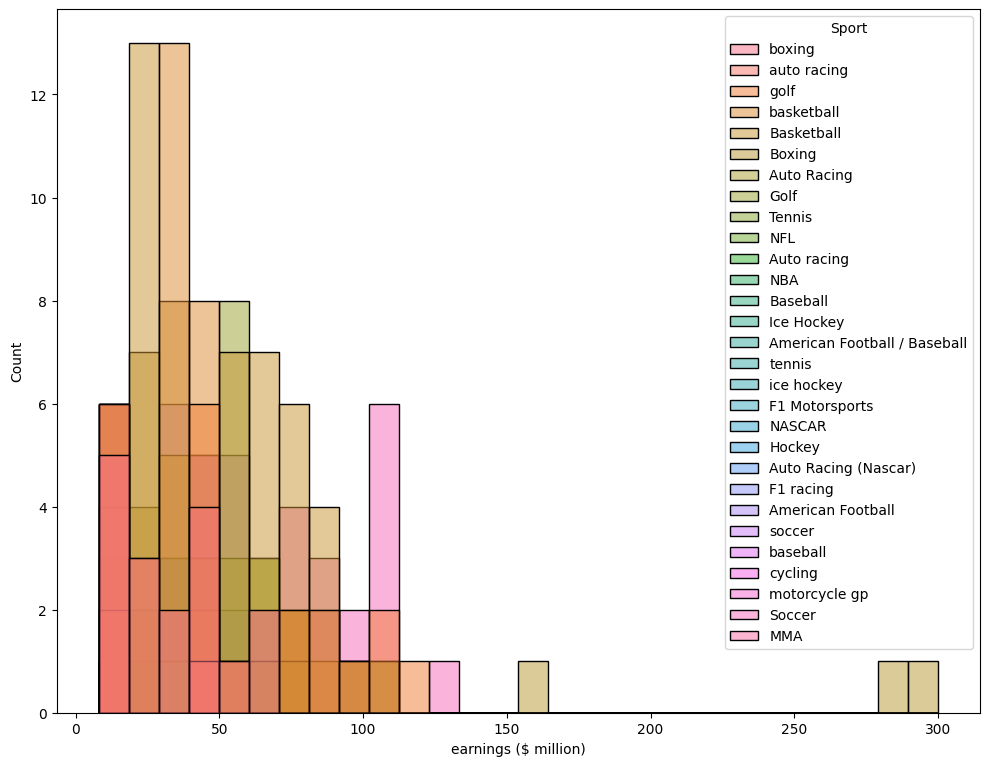

In [78]:
plt.figure(figsize=(10, 8))
sns.histplot(x = 'earnings ($ million)', hue = 'Sport', data = df)
plt.tight_layout()
plt.show()

In [79]:
px.box(df, x = 'Sport', y = 'earnings ($ million)', points= 'all')

##### Вывод

По графику понятно, что больше зарабатыют в боксе

### Две количественные переменные

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    object 
 4   Previous Year Rank    301 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.9+ KB


Меня интересует год и заработок

In [85]:
# plt.plot(df['Year'], df['earnings ($ million)'])
# plt.xlabel('Год')
# plt.ylabel('Заработок')
# plt.tight_layout()
# plt.show()

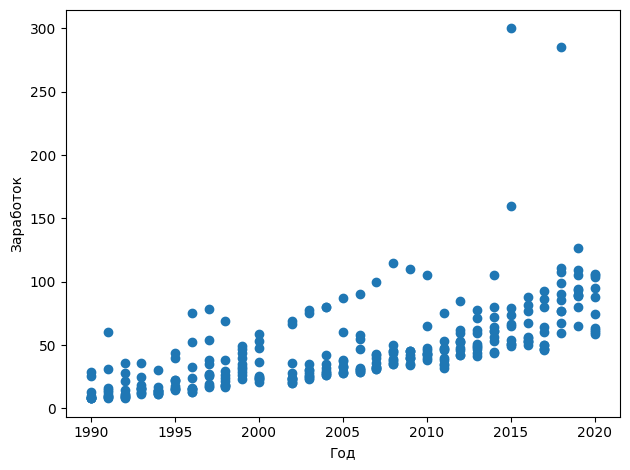

In [84]:
plt.scatter(df['Year'], df['earnings ($ million)'])
plt.xlabel('Год')
plt.ylabel('Заработок')
plt.tight_layout()
plt.show()

<Axes: >

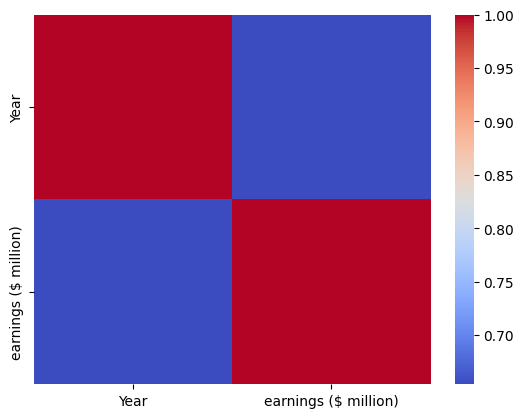

In [89]:
sns.heatmap(df[['Year', 'earnings ($ million)']].corr(), cmap = 'coolwarm')

##### Вывод

Данные столбцы имеют линейную зависимость. Если убрать выбросы

## Сохранение результата

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    object 
 4   Previous Year Rank    301 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.9+ KB


In [92]:
df.columns = ['index', 'Name', 'Nationality', 'CurrentRank', 'PreviousYearRank', 'Sport', 'Year', 'earnings_million_dollar']

In [93]:
df.head(1)

,index,Name,Nationality,CurrentRank,PreviousYearRank,Sport,Year,earnings_million_dollar
0,1,Mike Tyson,USA,1,>10,boxing,1990,28.6


In [94]:
df.to_csv("forbes_richest_atheletes.csv", index=False)

# Статистический анализ

## Чтение данных

In [95]:
df = pd.read_csv("/content/forbes_richest_atheletes.csv")

In [96]:
df.head()

,index,Name,Nationality,CurrentRank,PreviousYearRank,Sport,Year,earnings_million_dollar
0,1,Mike Tyson,USA,1,>10,boxing,1990,28.6
1,2,Buster Douglas,USA,2,>10,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,>10,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,>10,auto racing,1990,10.0
4,5,Alain Prost,France,5,>10,auto racing,1990,9.0


## Будем работать с заработком

В данном случае предполагаю, что средний заработок спортсменов составляет 24 млн.<br><br>
Нулевая гипотеза:

$$ H_0: \rho = 24 $$

Альтернативная гипотеза:

$$ H_1: \rho \neq 24 $$

## Работа с данными

In [261]:
data_array = df['earnings_million_dollar'].to_numpy()

In [262]:
data_array

array([ 28.6,  26. ,  13. ,  10. ,   9. ,   8.6,   8.5,   8.1,   8.1,
         8.1,  60.5,  31.5,  16. ,  14.5,  13. ,  11. ,  10.2,   9.3,
         9. ,   8.5,  35.9,  28. ,  22. ,  14.5,  11.1,  11. ,   9.5,
         9.2,   9. ,   8.5,  36. ,  25. ,  18.5,  16. ,  15.8,  15.2,
        15. ,  12.7,  12.6,  11.5,  30. ,  16.7,  14.8,  13.6,  13.5,
        13.5,  12.1,  12. ,  11.4,  11.3,  43.9,  40. ,  22.5,  22.2,
        21.9,  18. ,  16. ,  15.1,  15. ,  14.5,  75. ,  52.6,  33. ,
        24.4,  16.5,  15.5,  15.2,  15.1,  12.9,  12.9,  78.3,  54.3,
        38. ,  35. ,  27. ,  26.1,  25.4,  19.1,  17.9,  17. ,  69. ,
        38. ,  29.8,  26.8,  24.1,  21.6,  18.5,  18.3,  18.1,  17.2,
        49. ,  47. ,  43.5,  40. ,  35.5,  33. ,  31. ,  29. ,  26.5,
        23. ,  59. ,  53. ,  48. ,  37. ,  26. ,  24.5,  24. ,  23. ,
        23. ,  21. ,  69. ,  67. ,  36. ,  28. ,  24. ,  24. ,  23. ,
        23. ,  22. ,  20. ,  20. ,  78. ,  75. ,  35. ,  30.5,  30. ,
        28. ,  26. ,

In [263]:
len(data_array)

301

Выше при исследовании данных было видно, что данные имеют ненормальное распределение. Наши тесты работают только с нормальными данными или с данными, которые похожи на нормальные

In [264]:
# Добавить свой код в ячейку

mean_val = np.mean(data_array)
median_val = np.median(data_array)
var_val = np.var(data_array, ddof=1)
quantil_one = np.percentile(data_array, 25)
quantil_three = np.percentile(data_array, 75)
iqr = quantil_three - quantil_one

print(f"Среднее значение: {mean_val:.2f}") # :.2f - округление до 2 знаков после запятой
print(f"Медиана: {median_val:.2f}")
print(f"Выборочная дисперсия: {var_val:.2f}")
print(f"Межквартильный размах (IQR): {iqr:.2f}")

Среднее значение: 45.52
Медиана: 39.00
Выборочная дисперсия: 1123.95
Межквартильный размах (IQR): 35.40


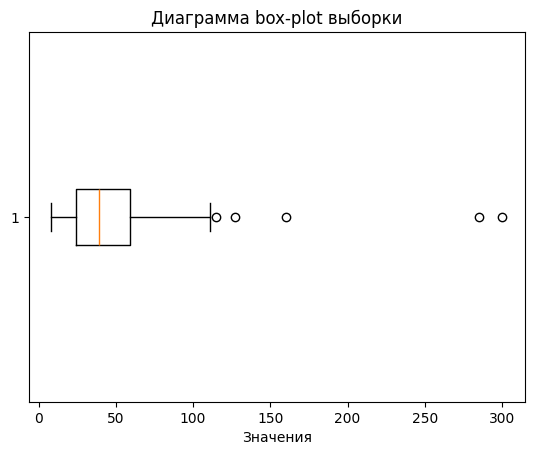

In [265]:
plt.boxplot(data_array, vert=False)
plt.title("Диаграмма box-plot выборки")
plt.xlabel("Значения")
plt.show()

In [266]:
lower_bound = quantil_one - 1.5 * iqr
upper_bound = quantil_three + 1.5 * iqr
data_array = data_array[(data_array >= lower_bound) & (data_array <= upper_bound)]

In [267]:
len(data_array)

296

<Axes: >

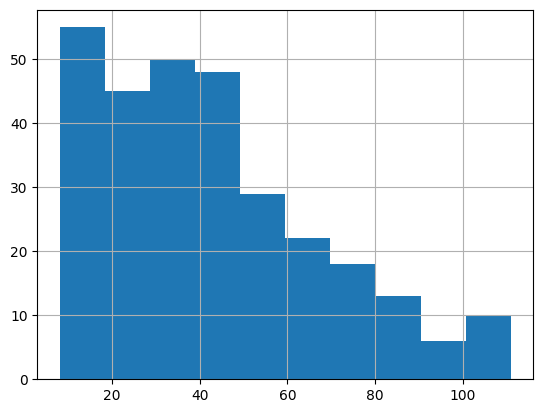

In [268]:
pd.Series(data_array).hist()

Данные все равно не имеют равномерное распределение

In [269]:
math_expectation = np.mean(data_array)
sigma_mle = np.std(data_array, ddof=0)

print(f"Оценка MLE для среднего (Математичекое ожидание): {math_expectation:.4f}")
print(f"Оценка MLE для стандартного отклонения (Сигма): {sigma_mle:.4f}")

Оценка MLE для среднего (Математичекое ожидание): 42.9507
Оценка MLE для стандартного отклонения (Сигма): 25.2386


In [270]:
from scipy.stats import shapiro, norm

In [271]:
statistics_shapiro, p_value = shapiro(data_array)

print(f"Статистика Шапиро-Уилка: {statistics_shapiro:.4f}")
print(f"P-value: {p_value:.4f}")

Статистика Шапиро-Уилка: 0.9360
P-value: 0.0000


In [272]:
alpha = 0.05
if p_value < alpha:
    print("Отвергаем гипотезу о нормальности распределения (данные не нормальны).")
else:
    print("Нет оснований отвергать гипотезу о нормальности распределения (данные нормальны).")

Отвергаем гипотезу о нормальности распределения (данные не нормальны).


<Axes: >

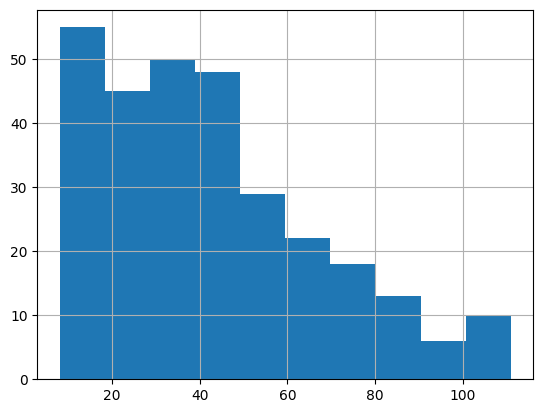

In [273]:
pd.Series(data_array).hist()

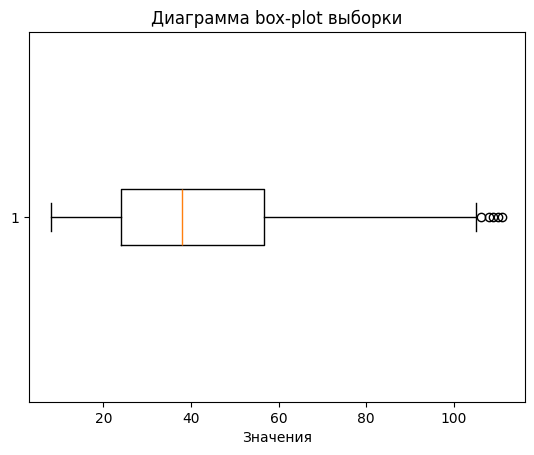

In [274]:
plt.boxplot(data_array, vert=False)
plt.title("Диаграмма box-plot выборки")
plt.xlabel("Значения")
plt.show()

Применим Z-тест. НО:<br>
Z-критерий можно использовать для ненормальных данных, если выборка большая.

## Z-test

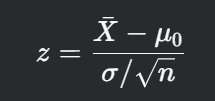

In [279]:
from scipy import stats

In [282]:
mu0 = 24 # гипотеза
sigma = np.std(data_array)
sample_mean = np.mean(data_array)
n = len(data_array)
z_score = (sample_mean - mu0) / (sigma / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
print(f"z-статистика = {z_score:.3f}, p-value = {p_value:.4f}")

z-статистика = 12.918, p-value = 0.0000


In [283]:
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергать нулевую гипотезу")

Отвергаем нулевую гипотезу


## Вывод

Отвергаем нулевую гипотезу и принимаем альтернативную гипотезу